In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## 準備訓練資料(Prepare training data)

In [2]:
df_boston_housing = pd.read_csv('BostonHousing.csv')
print(df_boston_housing.keys())
df_boston_housing

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RN', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 定義特徵和目標變數

In [3]:
X = df_boston_housing.drop('MEDV', axis=1)
stand = StandardScaler()
stand_X = stand.fit_transform(X)
stand_X
y = df_boston_housing['MEDV']

### 切割資料
把資料切割成訓練training data（80%）和測試testing data（20%）

In [4]:
X_train, X_test, y_train, y_test = train_test_split(stand_X, y, test_size=0.2, random_state=0)
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## 設定模型參數：
* criterion: 'squared_error'
* max_depth: 4
* min_samples_leaf: 10
* ccp_alpha: 5

In [5]:
regressor = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=4,
    min_samples_leaf=10,
    ccp_alpha=5
)

### 訓練回歸樹模型

In [6]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=5, max_depth=4, min_samples_leaf=10)

### 在測試集上進行預測

In [7]:
y_pred = regressor.predict(X_test)
y_pred

array([28.55043478, 21.60075758, 21.60075758, 14.45338346, 21.60075758,
       21.60075758, 21.60075758, 21.60075758, 21.60075758, 21.60075758,
       14.45338346, 14.45338346, 14.45338346, 14.45338346, 44.92916667,
       28.55043478, 21.60075758, 28.55043478, 28.55043478, 21.60075758,
       28.55043478, 21.60075758, 21.60075758, 28.55043478, 21.60075758,
       21.60075758, 21.60075758, 14.45338346, 44.92916667, 14.45338346,
       14.45338346, 21.60075758, 21.60075758, 21.60075758, 21.60075758,
       21.60075758, 14.45338346, 21.60075758, 14.45338346, 14.45338346,
       21.60075758, 21.60075758, 21.60075758, 14.45338346, 21.60075758,
       21.60075758, 14.45338346, 14.45338346, 14.45338346, 21.60075758,
       14.45338346, 14.45338346, 21.60075758, 44.92916667, 14.45338346,
       14.45338346, 21.60075758, 21.60075758, 21.60075758, 14.45338346,
       28.55043478, 21.60075758, 28.55043478, 28.55043478, 21.60075758,
       28.55043478, 14.45338346, 14.45338346, 14.45338346, 21.60

### 計算 RMSE

In [8]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse:.2f}')

RMSE: 5.95


### 可視化回歸樹

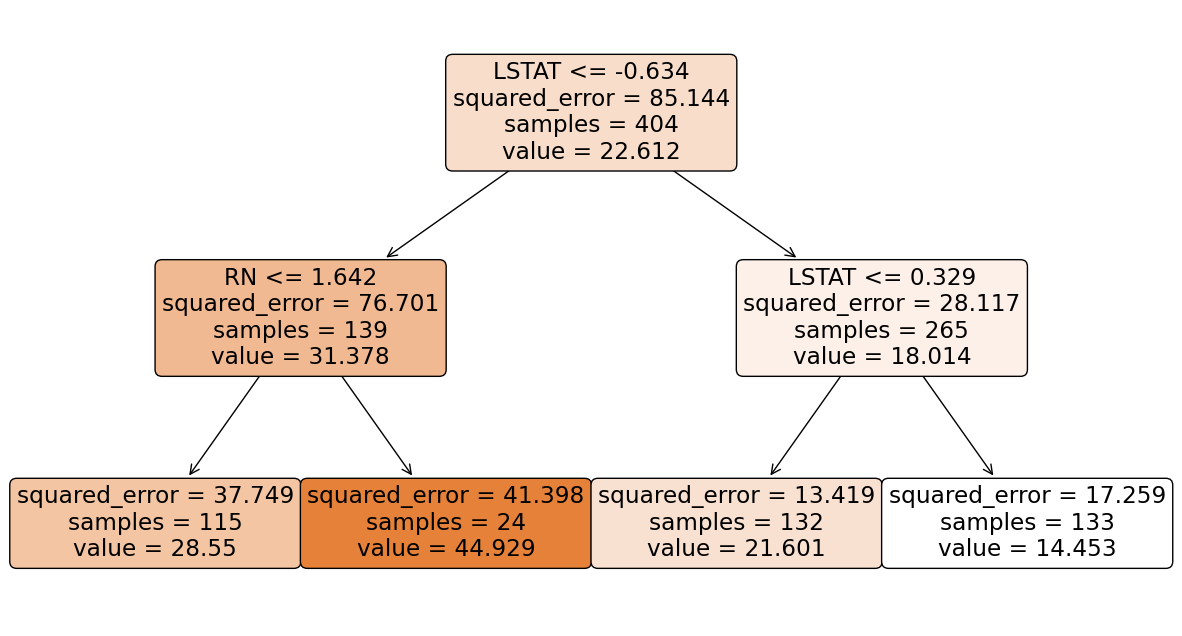

In [9]:
plt.figure(figsize=(15, 8))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

### 可視化特徵重要度

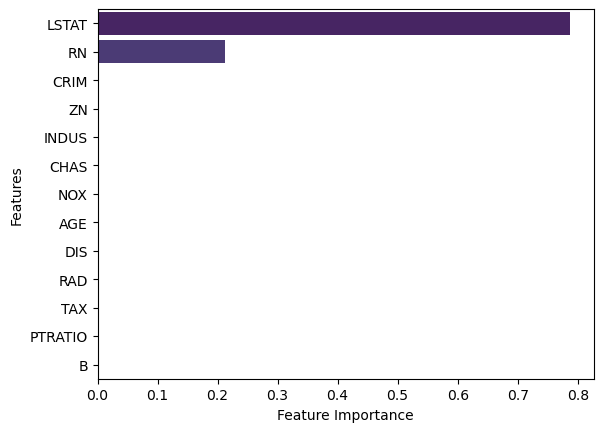

In [10]:
feature_importance = pd.Series(regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index, hue=feature_importance.index, palette='viridis', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()